In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel(r"C:\Users\user\Desktop\Data mining and Analytics\Project\StoresData.xlsx", 
                  sheet_name='Stores-Data')

# Display column names
print("Dataset columns:", df.columns.tolist())

# Initial data inspection
print("\nData overview:")
print(df.info())

# Display first 5 rows
print("\nSample data:")
print(df.head())

Dataset columns: ['Store No.', 'Sales $m', 'Wages $m', 'No. Staff', 'Location', "Loc'n (Num)", 'State', 'State (Num)', 'Age (Yrs)', 'GrossProfit', "Adv.$'000", 'Competitors', 'HrsTrading', 'Sundays', 'Sundays (Num)', 'Mng-Sex', 'Mng-Sex (Num)', 'Mng-Age', 'Mng-Exp', 'Mng-Train', 'Union%', 'Car Spaces', 'HomeDel', 'HomeDel (Num)', 'Basket:2013', 'Basket:2014']

Data overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store No.      150 non-null    int64  
 1   Sales $m       150 non-null    float64
 2   Wages $m       150 non-null    float64
 3   No. Staff      150 non-null    int64  
 4   Location       150 non-null    object 
 5   Loc'n (Num)    150 non-null    int64  
 6   State          150 non-null    object 
 7   State (Num)    150 non-null    int64  
 8   Age (Yrs)      150 non-null    int64  
 9   GrossProfit    150 non-null 

In [21]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values using forward fill
print("\nFilling missing values with forward fill method...")
df.ffill(inplace=True)

# Verify no missing values remain
print("\nMissing values after treatment:")
print(df.isnull().sum().sum(), "missing values remaining")

Missing values per column:
Store No.        0
Sales $m         0
Wages $m         0
No. Staff        0
Location         0
Loc'n (Num)      0
State            0
State (Num)      0
Age (Yrs)        0
GrossProfit      0
Adv.$'000        0
Competitors      0
HrsTrading       0
Sundays          0
Sundays (Num)    0
Mng-Sex          0
Mng-Sex (Num)    0
Mng-Age          0
Mng-Exp          0
Mng-Train        0
Union%           0
Car Spaces       0
HomeDel          0
HomeDel (Num)    0
Basket:2013      0
Basket:2014      0
dtype: int64

Filling missing values with forward fill method...

Missing values after treatment:
0 missing values remaining


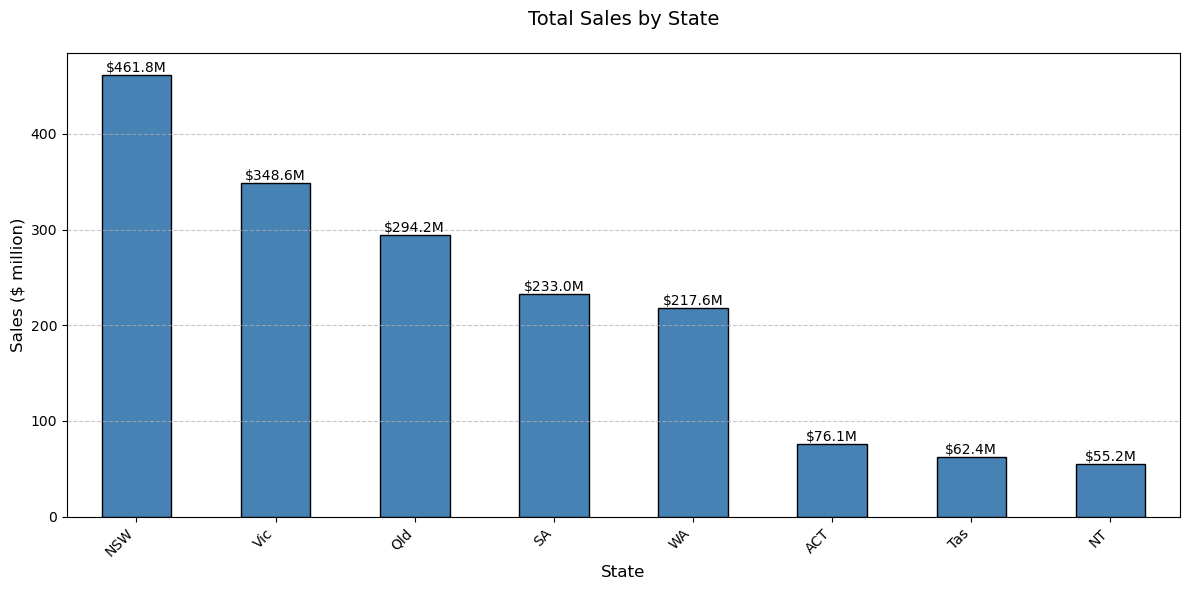

In [23]:
# Analyze sales by state
sales_by_state = df.groupby('State')['Sales $m'].sum().sort_values(ascending=False)

# Create visualization
plt.figure(figsize=(12, 6))
ax = sales_by_state.plot(kind='bar', color='steelblue', edgecolor='black')

# Customize the plot
plt.title('Total Sales by State', fontsize=14, pad=20)
plt.xlabel('State', fontsize=12)
plt.ylabel('Sales ($ million)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():.1f}M', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.savefig('sales_by_state.png', dpi=300, bbox_inches='tight')
plt.show()

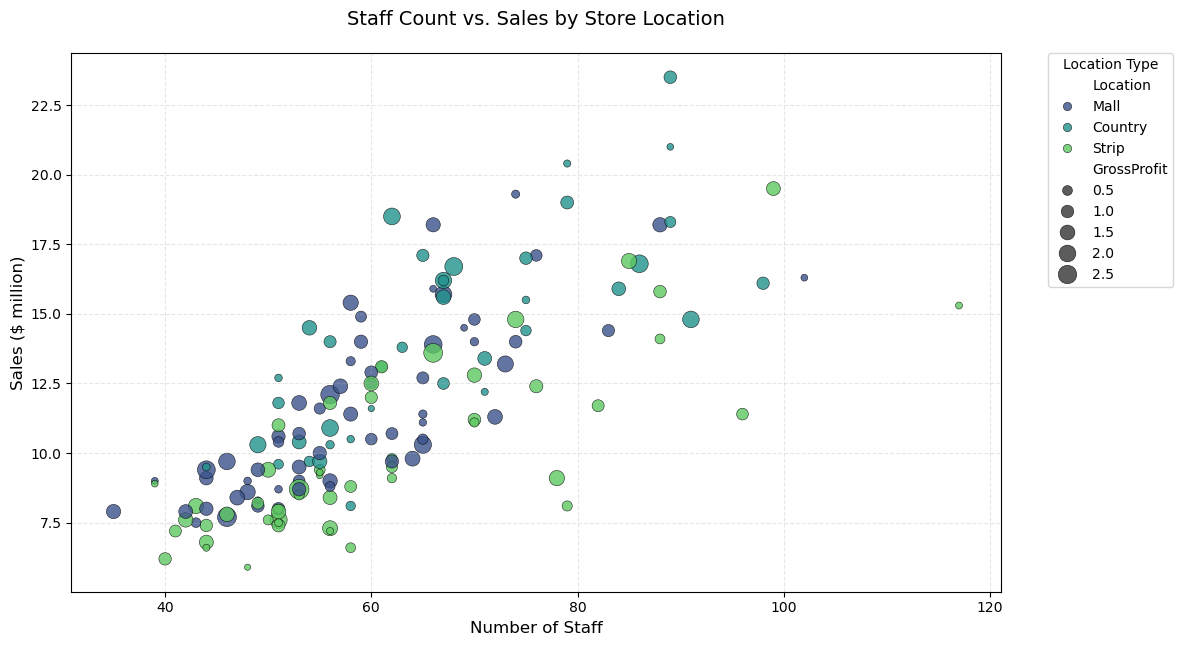

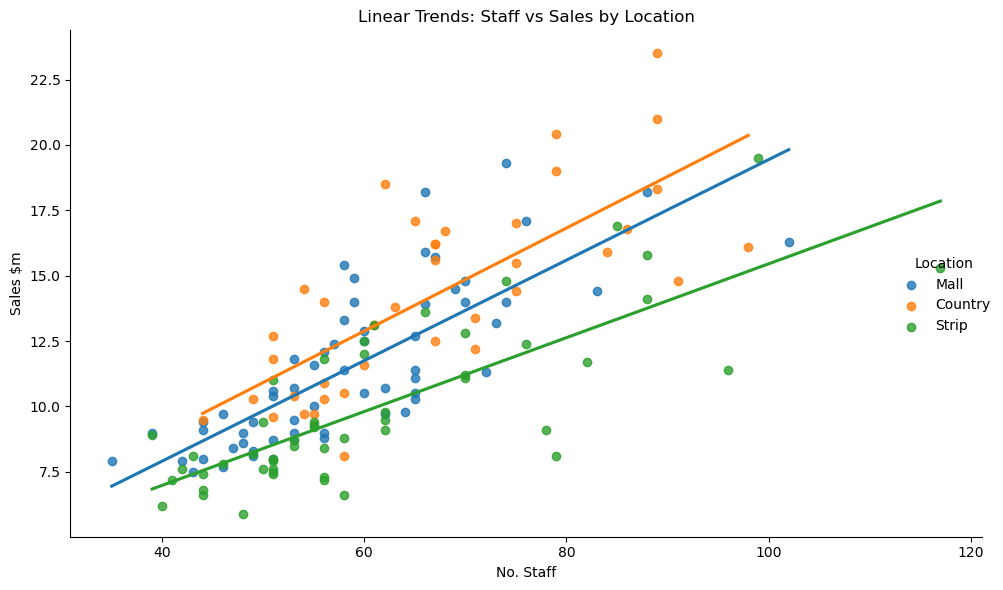


Correlation between Staff Count and Sales:
           No. Staff  Sales $m
No. Staff   1.000000  0.736821
Sales $m    0.736821  1.000000

Average Sales per Staff by Location:
Location
Country    0.212893
Mall       0.195975
Strip      0.163153
dtype: float64


In [25]:
# Relationship between Staff Count and Sales by Location
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=df,
    x='No. Staff',
    y='Sales $m',
    hue='Location',
    palette='viridis',
    size='GrossProfit',  # Additional dimension
    sizes=(20, 200),    # Size range
    alpha=0.8,
    edgecolor='black'
)

# Customize the plot
plt.title('Staff Count vs. Sales by Store Location', fontsize=14, pad=20)
plt.xlabel('Number of Staff', fontsize=12)
plt.ylabel('Sales ($ million)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Improve legend
plt.legend(
    title='Location Type',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

# Add regression lines for each location
sns.lmplot(
    data=df,
    x='No. Staff',
    y='Sales $m',
    hue='Location',
    height=6,
    aspect=1.5,
    ci=None
).set(
    title='Linear Trends: Staff vs Sales by Location'
)
plt.savefig('staff_vs_sales_trends.png', dpi=300, bbox_inches='tight')

# Save the main scatter plot
plt.tight_layout()
plt.savefig('staff_vs_sales.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional statistical analysis
print("\nCorrelation between Staff Count and Sales:")
print(df[['No. Staff', 'Sales $m']].corr())

print("\nAverage Sales per Staff by Location:")
print(df.groupby('Location')['Sales $m'].mean() / df.groupby('Location')['No. Staff'].mean())

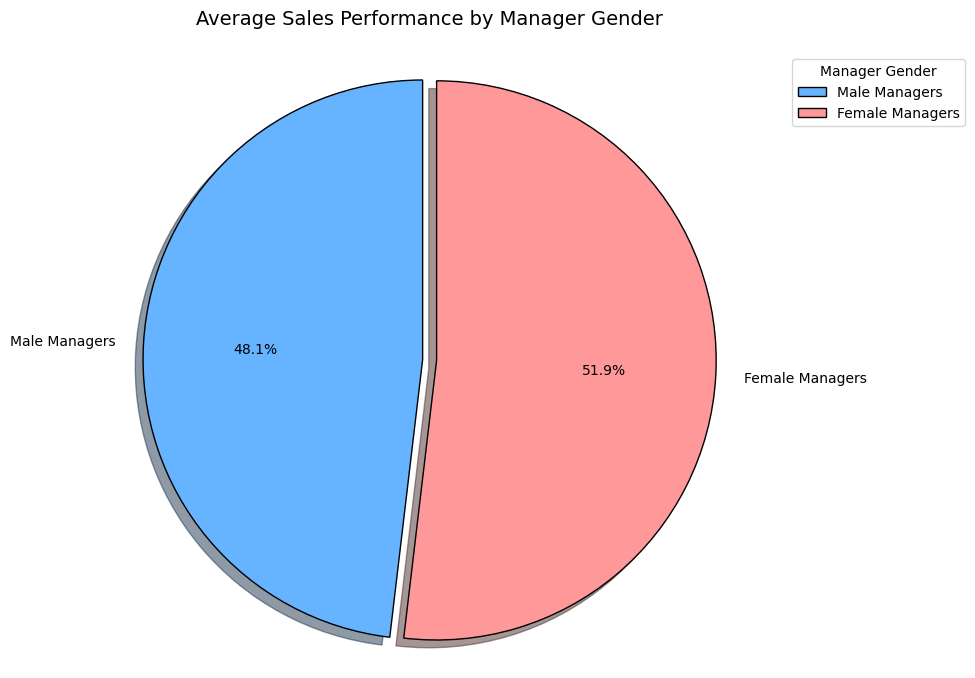


Detailed Performance Analysis by Gender:
            mean  median       std  count
Mng-Sex                                  
Female   10.9480    10.3  3.247450     25
Male     11.8016    11.1  3.627582    125

Independent t-test results:
T-statistic: 1.092
P-value: 0.2767


In [27]:
# Sales Performance by Manager Gender
plt.figure(figsize=(10, 8))

# Calculate mean sales by gender
performance_by_gender = df.groupby('Mng-Sex')['Sales $m'].mean()

# Create improved pie chart
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0)  # Emphasize the first slice

plt.pie(performance_by_gender, 
        labels=['Male Managers', 'Female Managers'],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})

# Add title and legend
plt.title('Average Sales Performance by Manager Gender', 
          fontsize=14, pad=20)
plt.legend(title="Manager Gender",
           loc="upper right",
           bbox_to_anchor=(1.2, 1))

# Equal aspect ratio ensures pie is circular
plt.axis('equal')  

# Save high-quality image
plt.savefig('sales_by_gender.png', 
            dpi=300, 
            bbox_inches='tight', 
            transparent=True)
plt.show()

# Additional statistical analysis
print("\nDetailed Performance Analysis by Gender:")
gender_stats = df.groupby('Mng-Sex')['Sales $m'].agg(['mean', 'median', 'std', 'count'])
print(gender_stats)

# Add t-test for statistical significance
from scipy.stats import ttest_ind

male_sales = df[df['Mng-Sex'] == 'Male']['Sales $m']
female_sales = df[df['Mng-Sex'] == 'Female']['Sales $m']

t_stat, p_value = ttest_ind(male_sales, female_sales)
print(f"\nIndependent t-test results:\nT-statistic: {t_stat:.3f}\nP-value: {p_value:.4f}")

C:\Users\user\AppData\Local\Temp\ipykernel_3144\3345537331.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(


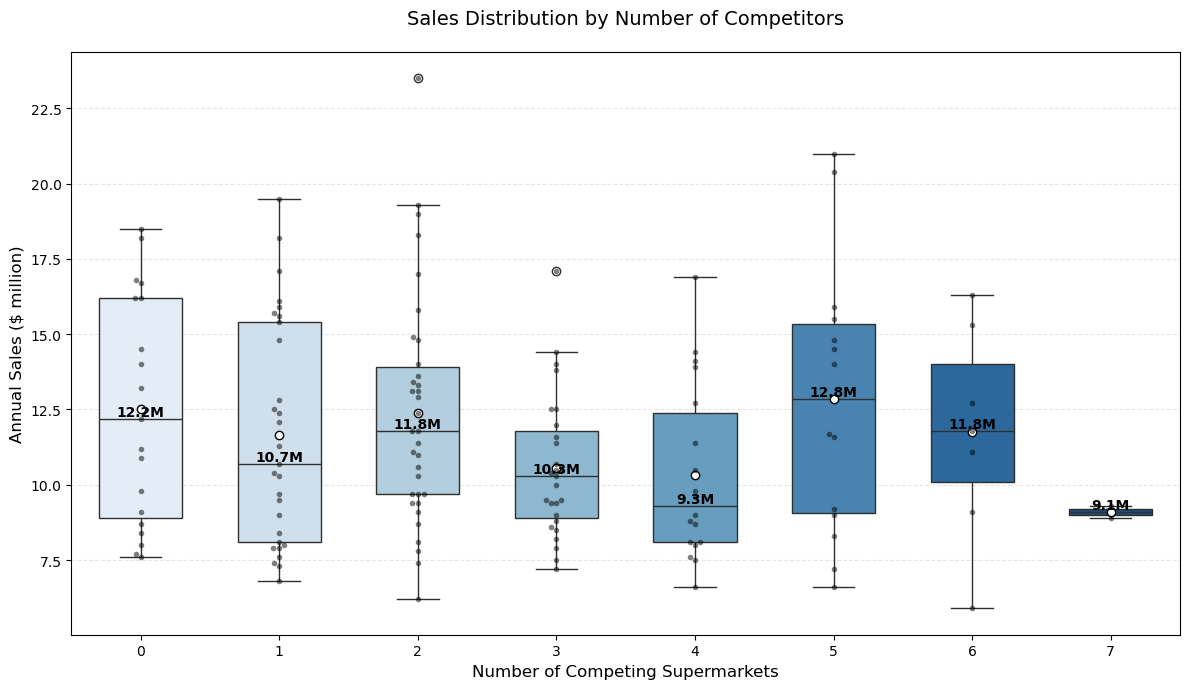


Detailed Sales Analysis by Competitor Count:
                  mean  median       std  count
Competitors                                    
0            12.521053   12.20  3.804030     19
1            11.668966   10.70  3.742908     29
2            12.400000   11.80  3.819884     34
3            10.562963   10.30  2.349492     27
4            10.316667    9.30  2.928611     18
5            12.835714   12.85  4.559961     14
6            11.742857   11.80  3.556148      7
7             9.100000    9.10  0.282843      2

ANOVA Results:
F-statistic: 1.49
P-value: 0.1746


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Impact of Competitor Count on Sales Performance
plt.figure(figsize=(12, 7))

# Create enhanced boxplot with swarmplot overlay
box = sns.boxplot(
    data=df,
    x='Competitors',
    y='Sales $m',
    palette='Blues',
    width=0.6,
    showmeans=True,
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'}
)

# Add individual data points
sns.swarmplot(
    data=df,
    x='Competitors',
    y='Sales $m',
    color='black',
    alpha=0.5,
    size=4
)

# Customize plot appearance
plt.title('Sales Distribution by Number of Competitors', fontsize=14, pad=20)
plt.xlabel('Number of Competing Supermarkets', fontsize=12)
plt.ylabel('Annual Sales ($ million)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add annotations for key statistics
medians = df.groupby('Competitors')['Sales $m'].median()
for xtick in box.get_xticks():
    box.text(xtick, medians[xtick], f'{medians[xtick]:.1f}M', 
            horizontalalignment='center', 
            verticalalignment='bottom',
            color='black',
            weight='semibold')

plt.tight_layout()
plt.savefig('sales_vs_competitors.png', dpi=300, bbox_inches='tight')
plt.show()

# Advanced statistical analysis
print("\nDetailed Sales Analysis by Competitor Count:")
comp_stats = df.groupby('Competitors')['Sales $m'].agg(['mean', 'median', 'std', 'count'])
print(comp_stats)

# ANOVA test for group differences
from scipy.stats import f_oneway

groups = [df[df['Competitors']==i]['Sales $m'] for i in sorted(df['Competitors'].unique())]
f_stat, p_value = f_oneway(*groups)

print(f"\nANOVA Results:\nF-statistic: {f_stat:.2f}\nP-value: {p_value:.4f}")

# Post-hoc Tukey test if ANOVA significant
if p_value < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    print("\nPost-hoc Tukey HSD Test:")
    tukey = pairwise_tukeyhsd(endog=df['Sales $m'],
                             groups=df['Competitors'],
                             alpha=0.05)
    print(tukey.summary())

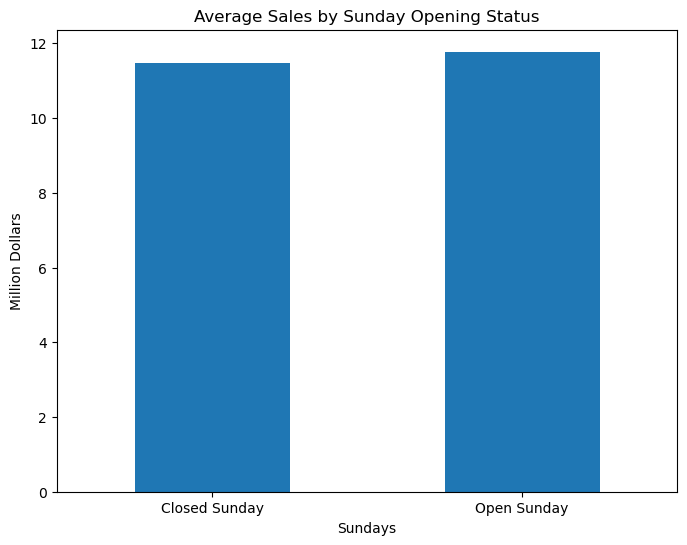

In [31]:
# Effect of Sunday opening on sales
sunday_effect = df.groupby('Sundays')['Sales $m'].mean()
plt.figure(figsize=(8,6))
sunday_effect.plot(kind='bar')
plt.title('Average Sales by Sunday Opening Status')
plt.ylabel('Million Dollars')
plt.xticks([0,1], ['Closed Sunday', 'Open Sunday'], rotation=0)
plt.savefig('sunday_effect.png')
plt.show()


Percentage Distribution by State:
Location  Country  Mall  Strip
State                         
ACT          33.3  50.0   16.7
NSW          27.5  45.0   27.5
NT           50.0   0.0   50.0
Qld          18.5  44.4   37.0
SA            9.1  22.7   68.2
Tas          40.0  40.0   20.0
Vic          33.3  43.3   23.3
WA           25.0  50.0   25.0


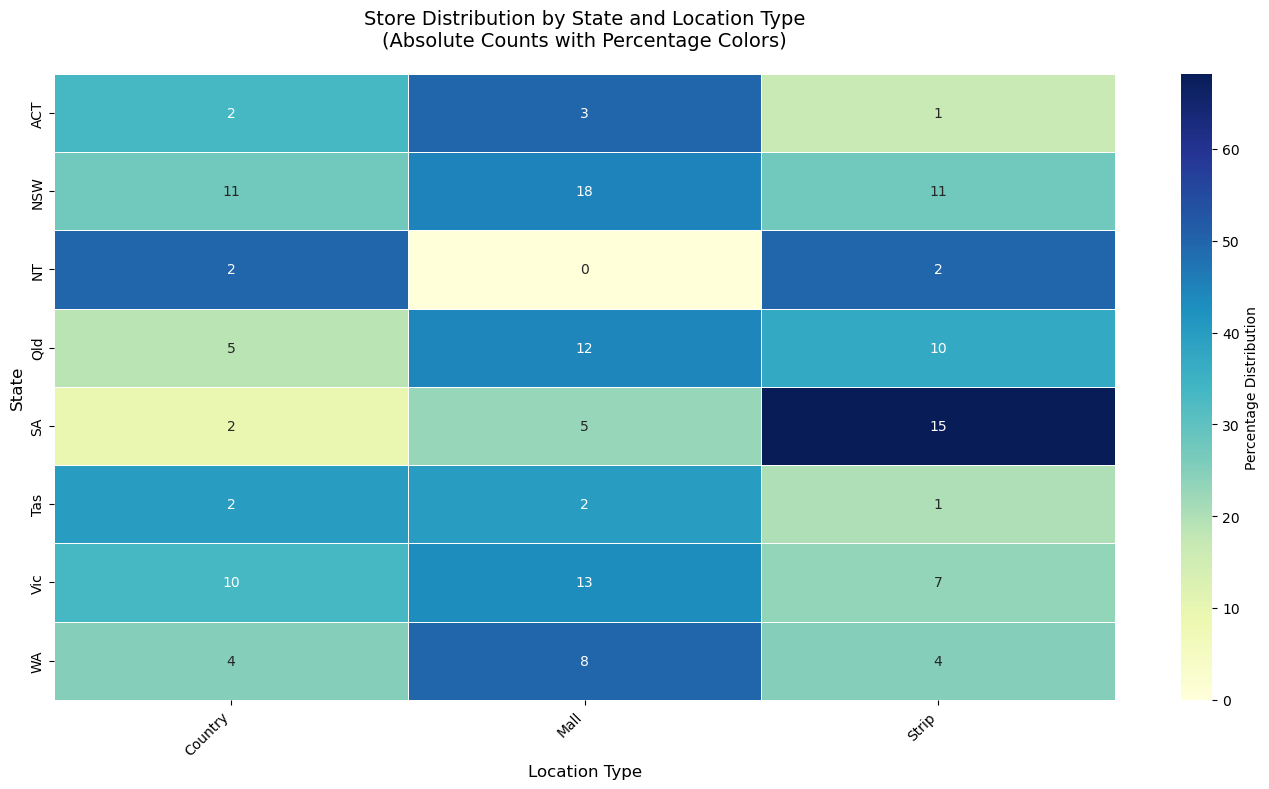

In [33]:
# Store Distribution Analysis by State and Location Type
plt.figure(figsize=(14, 8))

# Create absolute counts crosstab first
abs_counts = pd.crosstab(df['State'], df['Location'])

# Then calculate percentages
location_dist = abs_counts.div(abs_counts.sum(axis=1), axis=0) * 100

# Create enhanced crosstab heatmap
ax = sns.heatmap(location_dist, 
                 annot=abs_counts,  # Show absolute counts
                 fmt='d',           # Format as integers
                 cmap='YlGnBu',
                 linewidths=0.5,
                 linecolor='white',
                 cbar_kws={'label': 'Percentage Distribution'})

# Customize plot appearance
plt.title('Store Distribution by State and Location Type\n(Absolute Counts with Percentage Colors)', 
          fontsize=14, pad=20)
plt.xlabel('Location Type', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Print the percentage table separately
print("\nPercentage Distribution by State:")
print(location_dist.round(1))

plt.tight_layout()
plt.savefig('location_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
# Save processed data
df.to_excel('processed_stores_data.xlsx', index=False)

# Generate PDF report
from fpdf import FPDF

# Create PDF object
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

# Add title
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="FOODmart Stores Analysis Report", ln=1, align='C')
pdf.set_font("Arial", size=12)
pdf.ln(10)

# Add visualizations to PDF
visualizations = [
    ('sales_by_state.png', 'Sales Distribution by State'),
    ('staff_vs_sales.png', 'Staff Count vs Sales by Location'),
    ('sales_by_gender.png', 'Sales Performance by Manager Gender'),
    ('sales_vs_competitors.png', 'Sales by Number of Competitors'),
    ('sunday_effect.png', 'Sunday Opening Impact on Sales'),
    ('location_distribution.png', 'Store Distribution by State and Location')
]

for img_file, caption in visualizations:
    # Add caption
    pdf.set_font("Arial", 'B', 12)
    pdf.cell(200, 10, txt=caption, ln=1)
    pdf.set_font("Arial", size=10)
    
    # Add image
    pdf.image(img_file, x=10, w=180)
    pdf.ln(5)  # Add small space after each image

# Save PDF
pdf.output("stores_analysis_report.pdf")
print("PDF report generated: stores_analysis_report.pdf")

PDF report generated: stores_analysis_report.pdf


In [103]:
import os
pdf_path = os.path.abspath("stores_analysis_report.pdf")
print(f"PDF saved at: {pdf_path}")

PDF saved at: C:\Users\user\stores_analysis_report.pdf


In [145]:
print("Classification Metrics:")
print(f"- Accuracy: {accuracy_score(y_test, y_pred_class):.2f}")
print(f"- Recall (Weighted): {recall_score(y_test, y_pred_class, average='weighted'):.2f}")
print(f"- F1-Score (Weighted): {f1_score(y_test, y_pred_class, average='weighted'):.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_class, labels=labels))

Classification Metrics:
- Accuracy: 0.87
- Recall (Weighted): 0.87
- F1-Score (Weighted): 0.86

Confusion Matrix:
[[13  0  0]
 [ 2 13  1]
 [ 0  1  0]]


In [113]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree - MSE:", mse)
print("Decision Tree - R^2 Score:", r2)

Decision Tree - MSE: 3.933333333333333
Decision Tree - R^2 Score: 0.9475524475524475


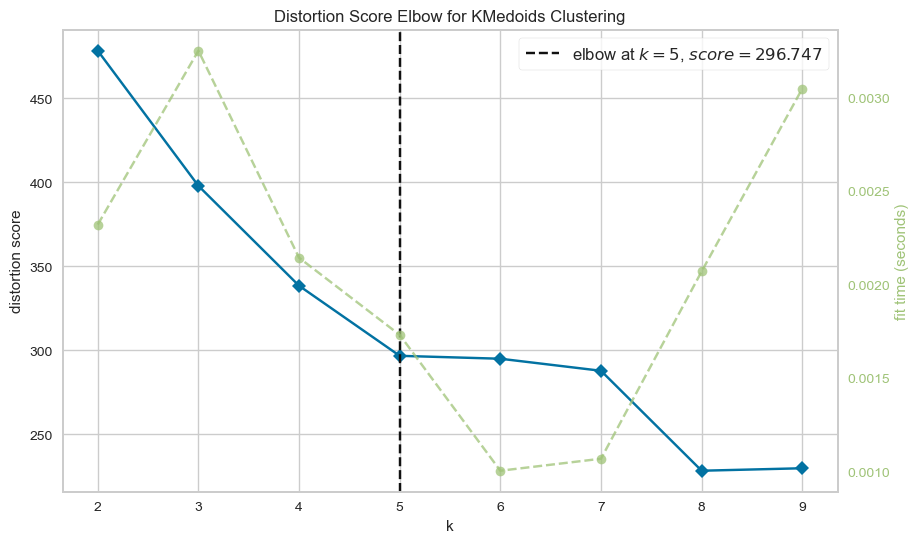

Optimal k for KMedoids: 5


<Figure size 800x550 with 0 Axes>

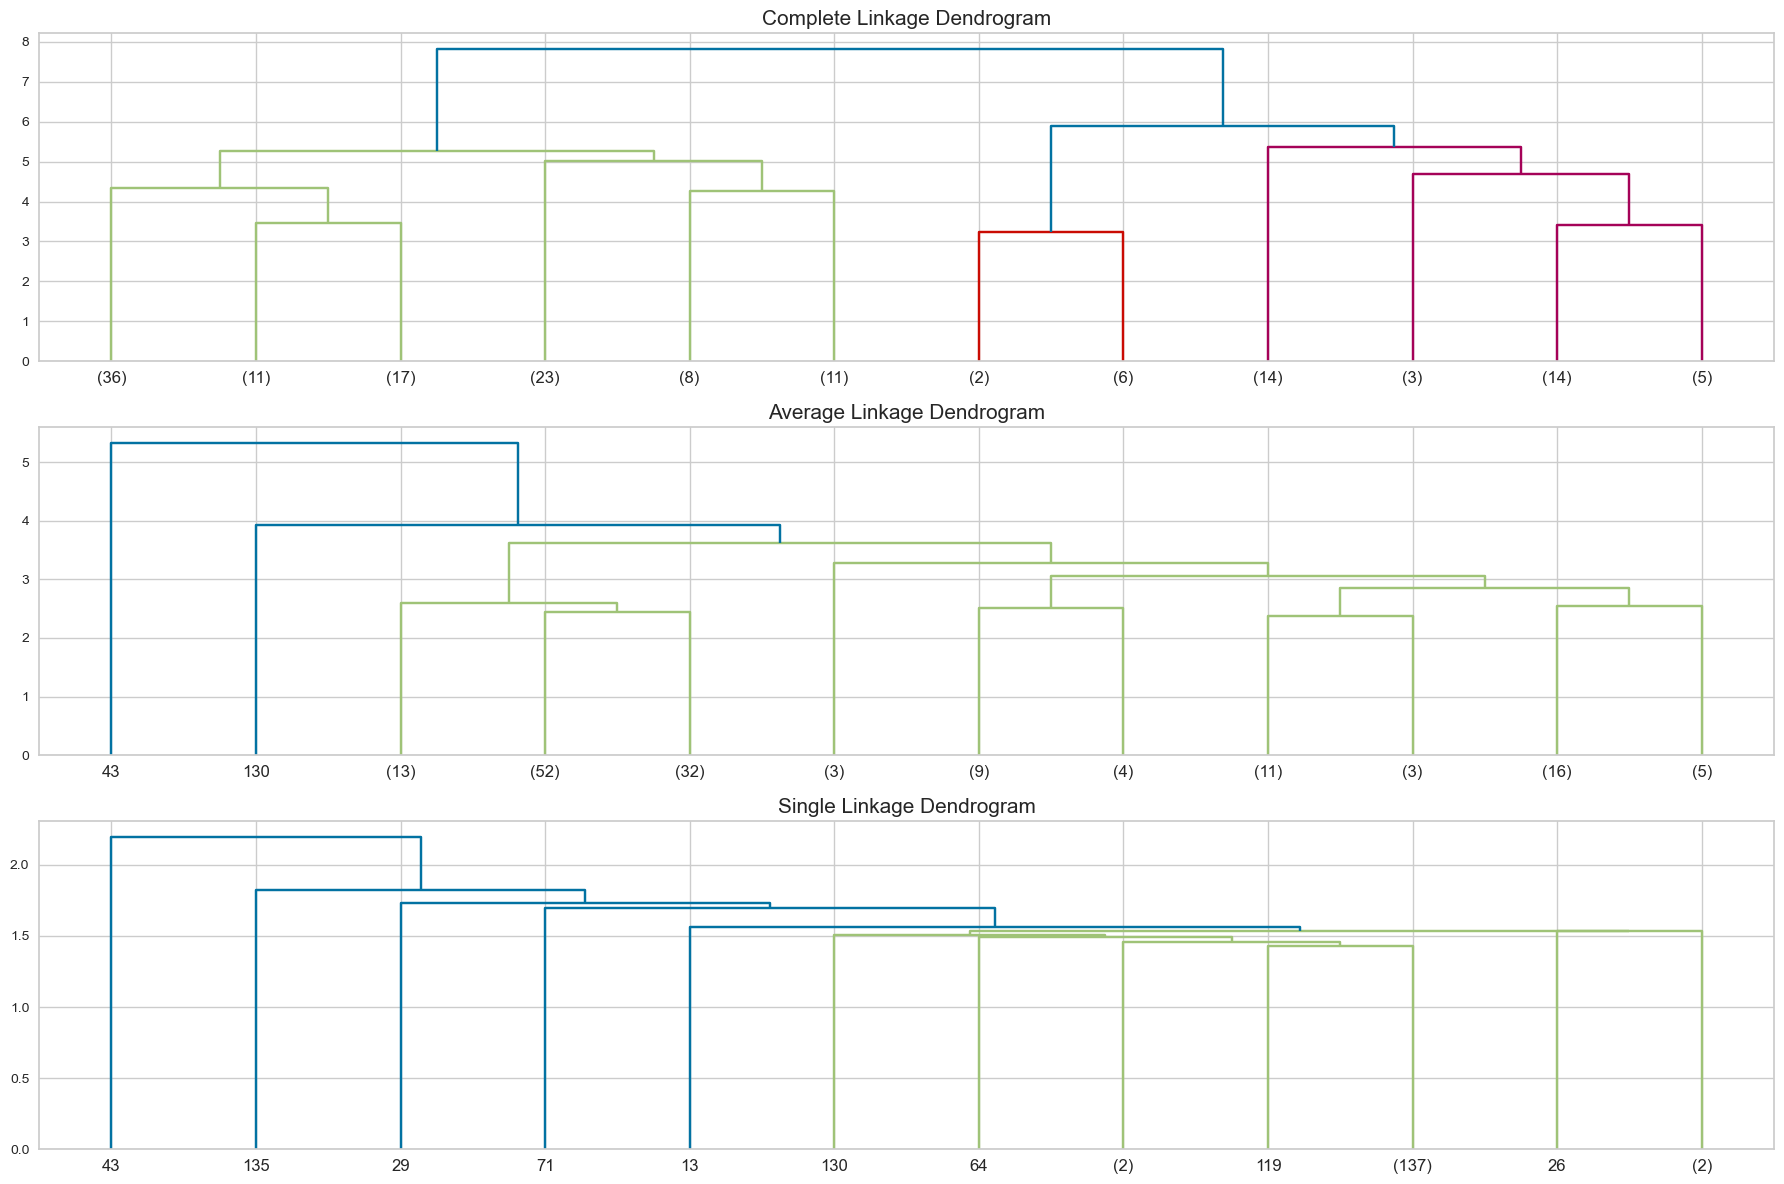

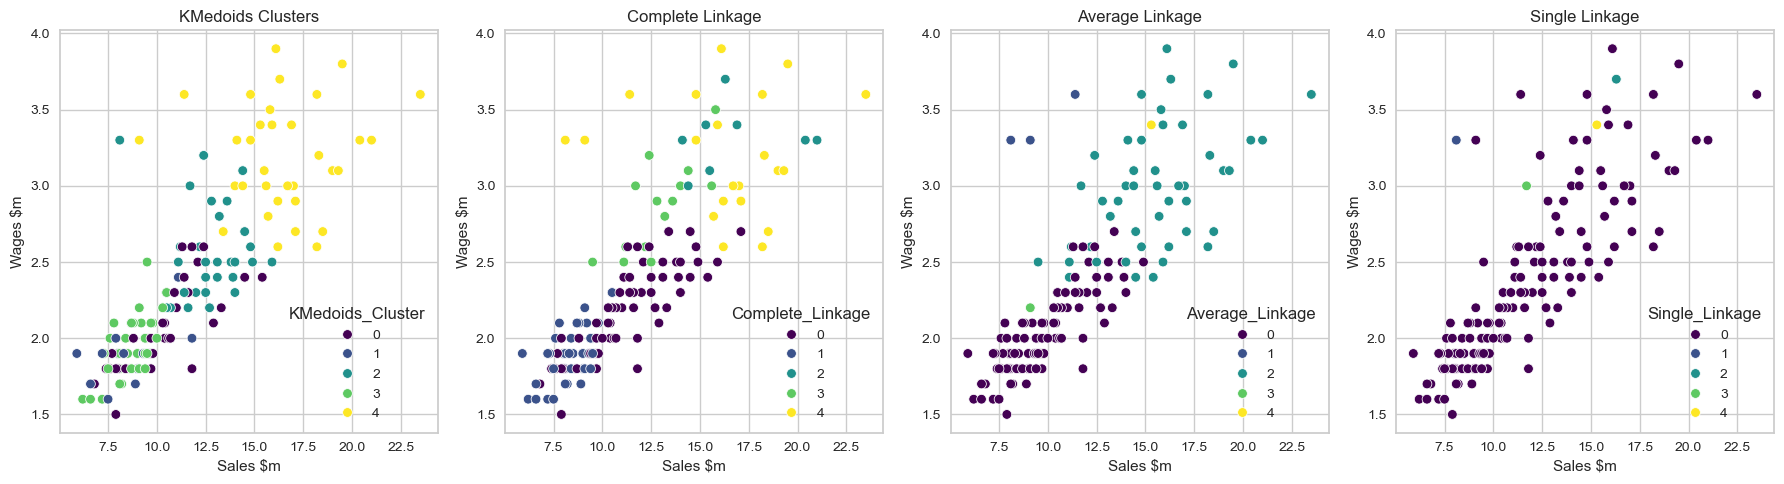

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\m


Clustering Evaluation Metrics:
| Method           |   Silhouette |   Calinski-Harabasz |   Davies-Bouldin |   Accuracy |    Recall |   F1-Score |
|:-----------------|-------------:|--------------------:|-----------------:|-----------:|----------:|-----------:|
| KMedoids         |    0.235089  |            55.3683  |         1.32466  |  0.16      | 0.16      |  0.1472    |
| Complete Linkage |    0.225205  |            48.0615  |         1.3683   |  0.146667  | 0.146667  |  0.152478  |
| Average Linkage  |    0.217734  |            26.2927  |         0.930654 |  0.0533333 | 0.0533333 |  0.0486511 |
| Single Linkage   |    0.0690809 |             3.09203 |         0.619984 |  0.0133333 | 0.0133333 |  0.0256108 |


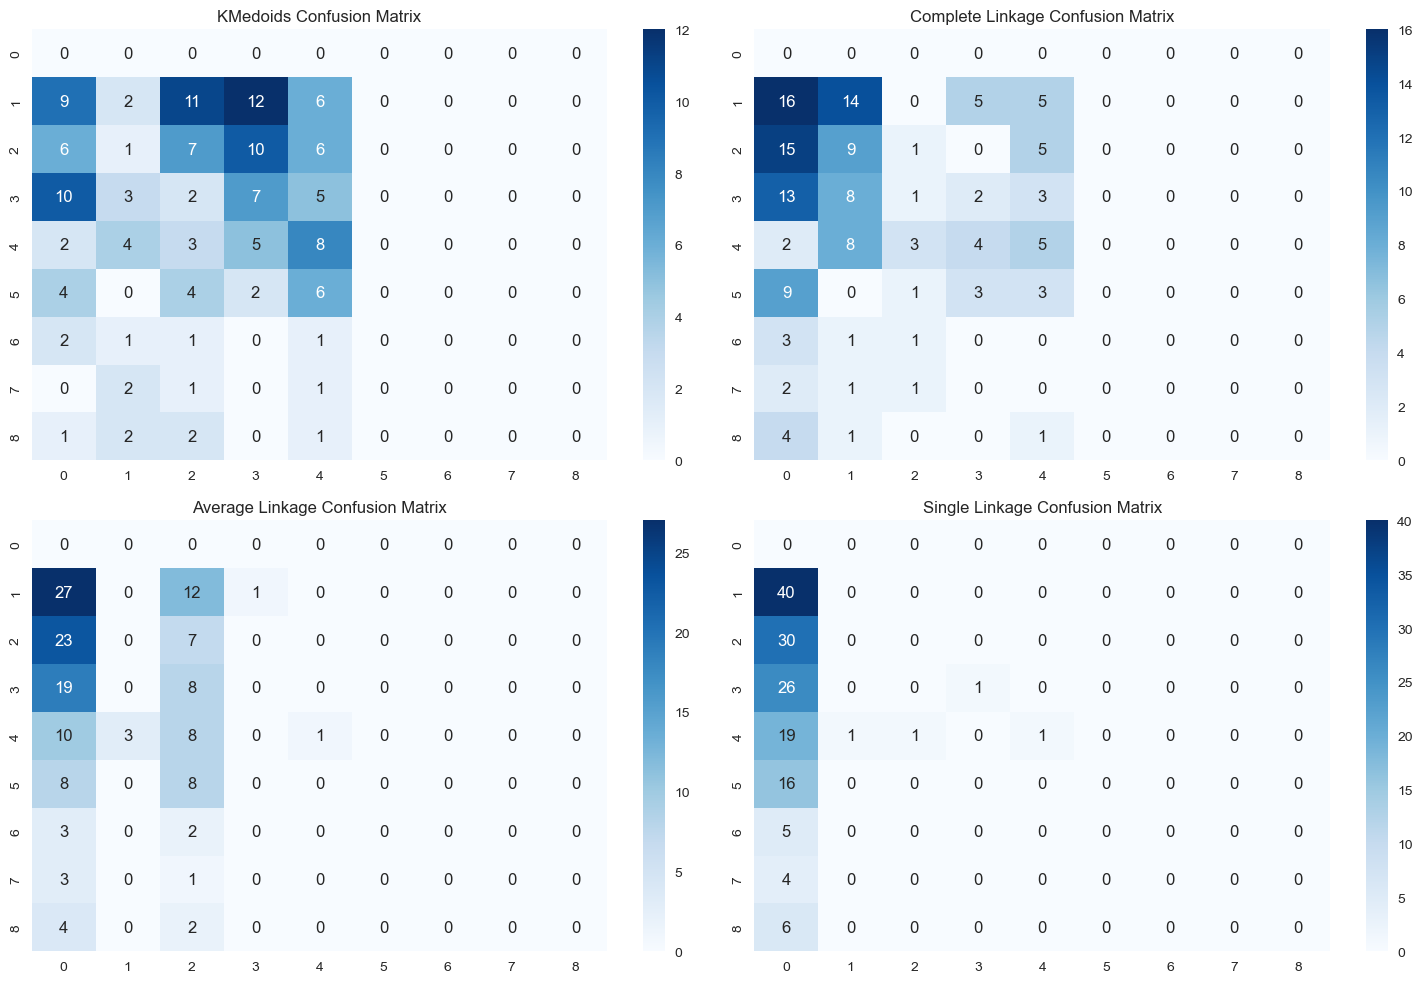


Best clustering method based on Silhouette Score: KMedoids


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import confusion_matrix, classification_report
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from yellowbrick.cluster import KElbowVisualizer

# Prepare data (using same features as before)
features = ['Sales $m', 'Wages $m', 'No. Staff', 'Age (Yrs)', 'Competitors']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Determine optimal k for KMedoids using Elbow Method
plt.figure(figsize=(10, 6))
visualizer = KElbowVisualizer(KMedoids(random_state=42), k=(2,10), metric='distortion')
visualizer.fit(X_scaled)
visualizer.show()
plt.savefig('kmedoids_elbow.png', dpi=300, bbox_inches='tight')
optimal_k = visualizer.elbow_value_
print(f"Optimal k for KMedoids: {optimal_k}")

# 2. Perform KMedoids clustering with optimal k
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)
df['KMedoids_Cluster'] = kmedoids_labels

# 3. Hierarchical Clustering - 3 types

# 3.1 Complete Linkage
Z_complete = linkage(X_scaled, method='complete')
complete_labels = fcluster(Z_complete, t=optimal_k, criterion='maxclust')
df['Complete_Linkage'] = complete_labels - 1  # Convert to 0-based index

# 3.2 Average Linkage
Z_average = linkage(X_scaled, method='average')
average_labels = fcluster(Z_average, t=optimal_k, criterion='maxclust')
df['Average_Linkage'] = average_labels - 1

# 3.3 Single Linkage
Z_single = linkage(X_scaled, method='single')
single_labels = fcluster(Z_single, t=optimal_k, criterion='maxclust')
df['Single_Linkage'] = single_labels - 1

# 4. Visualization of all 3 hierarchical methods
plt.figure(figsize=(18, 12))

# Complete Linkage Dendrogram
plt.subplot(3, 1, 1)
dendrogram(Z_complete, truncate_mode='lastp', p=12, show_leaf_counts=True)
plt.title('Complete Linkage Dendrogram', size=15)

# Average Linkage Dendrogram
plt.subplot(3, 1, 2)
dendrogram(Z_average, truncate_mode='lastp', p=12, show_leaf_counts=True)
plt.title('Average Linkage Dendrogram', size=15)

# Single Linkage Dendrogram
plt.subplot(3, 1, 3)
dendrogram(Z_single, truncate_mode='lastp', p=12, show_leaf_counts=True)
plt.title('Single Linkage Dendrogram', size=15)

plt.tight_layout()
plt.savefig('hierarchical_dendrograms.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Cluster comparison visualization
plt.figure(figsize=(18, 5))

# KMedoids
plt.subplot(1, 4, 1)
sns.scatterplot(data=df, x='Sales $m', y='Wages $m', hue='KMedoids_Cluster', palette='viridis')
plt.title('KMedoids Clusters')

# Complete Linkage
plt.subplot(1, 4, 2)
sns.scatterplot(data=df, x='Sales $m', y='Wages $m', hue='Complete_Linkage', palette='viridis')
plt.title('Complete Linkage')

# Average Linkage
plt.subplot(1, 4, 3)
sns.scatterplot(data=df, x='Sales $m', y='Wages $m', hue='Average_Linkage', palette='viridis')
plt.title('Average Linkage')

# Single Linkage
plt.subplot(1, 4, 4)
sns.scatterplot(data=df, x='Sales $m', y='Wages $m', hue='Single_Linkage', palette='viridis')
plt.title('Single Linkage')

plt.tight_layout()
plt.savefig('cluster_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Evaluation Metrics (assuming we have ground truth labels in 'State (Num)')
methods = {
    'KMedoids': kmedoids_labels,
    'Complete Linkage': df['Complete_Linkage'],
    'Average Linkage': df['Average_Linkage'],
    'Single Linkage': df['Single_Linkage']
}

results = []
for name, labels in methods.items():
    silhouette = silhouette_score(X_scaled, labels)
    calinski = calinski_harabasz_score(X_scaled, labels)
    davies = davies_bouldin_score(X_scaled, labels)
    
    if 'State (Num)' in df.columns:
        cm = confusion_matrix(df['State (Num)'], labels)
        report = classification_report(df['State (Num)'], labels, output_dict=True)
        accuracy = report['accuracy']
        weighted_avg = report['weighted avg']
        f1 = weighted_avg['f1-score']
        recall = weighted_avg['recall']
    else:
        cm, accuracy, f1, recall = None, None, None, None
    
    results.append({
        'Method': name,
        'Silhouette': silhouette,
        'Calinski-Harabasz': calinski,
        'Davies-Bouldin': davies,
        'Accuracy': accuracy,
        'Recall': recall,
        'F1-Score': f1
    })

# Create evaluation dataframe
evaluation_df = pd.DataFrame(results)

# Print evaluation metrics
print("\nClustering Evaluation Metrics:")
print(evaluation_df.to_markdown(index=False))

# If confusion matrix is available
if 'State (Num)' in df.columns:
    plt.figure(figsize=(15, 10))
    for i, (name, labels) in enumerate(methods.items(), 1):
        plt.subplot(2, 2, i)
        sns.heatmap(confusion_matrix(df['State (Num)'], labels), 
                   annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} Confusion Matrix')
    plt.tight_layout()
    plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
    plt.show()

# Comparison Conclusion
best_method = evaluation_df.loc[evaluation_df['Silhouette'].idxmax()]['Method']
print(f"\nBest clustering method based on Silhouette Score: {best_method}")


Classification Metrics:
- Accuracy: 0.87
- Recall (Weighted): 0.87
- F1-Score (Weighted): 0.86

Confusion Matrix:
[[13  0  0]
 [ 2 13  1]
 [ 0  1  0]]


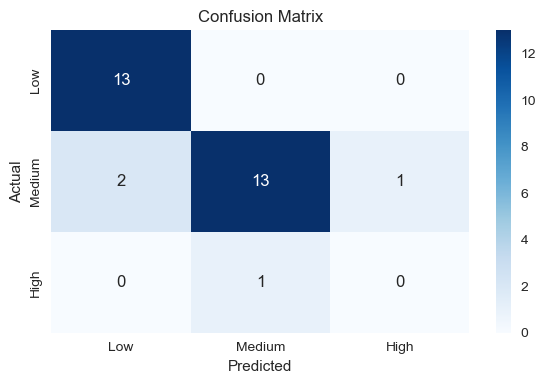

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# إنشاء الفئات من Sales $m
bins = [0, 10, 20, float('inf')]
labels = ['Low', 'Medium', 'High']
df['Sales_Category'] = pd.cut(df['Sales $m'], bins=bins, labels=labels)

# اختيار الخصائص المستقلة
X = df[['Wages $m', 'No. Staff', 'Competitors']]
y = df['Sales_Category']

# تقسيم البيانات لتدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب شجرة القرار
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# التنبؤ
y_pred_class = clf.predict(X_test)

# عرض النتائج
print("Classification Metrics:")
print(f"- Accuracy: {accuracy_score(y_test, y_pred_class):.2f}")
print(f"- Recall (Weighted): {recall_score(y_test, y_pred_class, average='weighted'):.2f}")
print(f"- F1-Score (Weighted): {f1_score(y_test, y_pred_class, average='weighted'):.2f}")

# مصفوفة الالتباس
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_class, labels=labels)
print(cm)

# رسم مصفوفة الالتباس
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
